## Assignment interview

### 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


### 2. Loading the data

In [2]:
monthly_payment_df = pd.read_csv("Monthly_payments.csv")
user_id_df = pd.read_csv("user_id_table.csv")

In [3]:
#check the monthly payment tables
monthly_payment_df

,user_id,date,payment
0,73,2017-10-01 00:00:00.000000 UTC,1
1,216,2017-10-01 00:00:00.000000 UTC,1
2,3586,2017-10-01 00:00:00.000000 UTC,1
3,4197,2017-10-01 00:00:00.000000 UTC,1
4,4680,2017-10-01 00:00:00.000000 UTC,1
...,...,...,...
198110,47915,2017-12-01 00:00:00.000000 UTC,1
198111,48003,2017-12-01 00:00:00.000000 UTC,1
198112,48774,2017-12-01 00:00:00.000000 UTC,1
198113,49814,2017-12-01 00:00:00.000000 UTC,1


In [4]:
#check the user_id table
user_id_df

,user_id,f_0,f_1,f_2,f_3,f_4
0,117,0.185834,0.257087,0.681947,0.343844,0.562220
1,140,0.274930,0.042934,0.627473,0.534509,0.493101
2,159,0.548740,0.605102,0.369127,0.384560,0.220441
3,175,0.308355,0.600812,0.556980,0.167359,0.453548
4,297,0.724011,0.186172,0.323603,0.579623,0.021604
...,...,...,...,...,...,...
49995,49585,0.691765,0.368827,0.268830,0.536567,0.158915
49996,49751,0.569852,0.289845,0.461525,0.374787,0.487635
49997,49782,0.540032,0.502296,0.185834,0.075061,0.644900
49998,49908,0.420014,0.449307,0.200692,0.535565,0.542775


### 3. Feature engineering

In [5]:
#convert the date into pandas.Timestamp and add date features like year, month, quarter etc..
monthly_payment_df["date"] = monthly_payment_df["date"].apply(lambda x: x.split(" ")[0])
monthly_payment_df["date"] = pd.to_datetime(monthly_payment_df["date"])
monthly_payment_df["year"] = monthly_payment_df["date"].dt.year
monthly_payment_df["quarter"] = monthly_payment_df["date"].dt.quarter
monthly_payment_df["month"] = monthly_payment_df["date"].dt.month
monthly_payment_df["dayofyear"] = monthly_payment_df["date"].dt.dayofyear


#joining the table with the user table
df_merged = pd.merge(monthly_payment_df, user_id_df, on="user_id", how="inner")
df_merged = df_merged.sort_values(["user_id", "date"])
df_merged


,user_id,date,payment,year,quarter,month,dayofyear,f_0,f_1,f_2,f_3,f_4
21418,0,2016-02-01,1,2016,1,2,32,0.224480,0.388817,0.460769,0.573753,0.506882
187133,0,2016-03-01,1,2016,1,3,61,0.224480,0.388817,0.460769,0.573753,0.506882
102211,0,2016-04-01,1,2016,2,4,92,0.224480,0.388817,0.460769,0.573753,0.506882
165824,0,2016-05-01,1,2016,2,5,122,0.224480,0.388817,0.460769,0.573753,0.506882
83542,0,2016-06-01,1,2016,2,6,153,0.224480,0.388817,0.460769,0.573753,0.506882
...,...,...,...,...,...,...,...,...,...,...,...,...
183728,49996,2016-09-01,1,2016,3,9,245,0.605773,0.609872,0.137083,0.472622,0.137594
32565,49997,2016-10-01,1,2016,4,10,275,0.323261,0.285334,0.438968,0.772342,0.157740
156940,49997,2016-11-01,1,2016,4,11,306,0.323261,0.285334,0.438968,0.772342,0.157740
101160,49998,2016-04-01,1,2016,2,4,92,0.507291,0.759812,0.088509,0.353841,0.179736


In [6]:
df_merged['days_from_first_date'] = (
    df_merged.groupby('user_id')['date']
    .transform(lambda x: (x - x.min()).dt.days)
)

# Calculate the cumulative sum of payments for each user
df_merged['number_payments_cumulative'] = df_merged.groupby('user_id')['date'].transform('cumcount') + 1  # Start counting from 1

# Calculate the cumulative sum of payments for each user within every year
df_merged['number_payments_cumulative_per_year'] = df_merged.groupby(['user_id', 'year'])['date'].transform('cumcount') + 1  # Start counting from 1

# Calculate the cumulative sum of payments for each user per year per quarter
df_merged['number_payments_cumulative_per_year_per_quarter'] = df_merged.groupby(['user_id', 'year', 'quarter'])['date'].transform('cumcount') + 1  # Start counting from 1
df_merged


,user_id,date,payment,year,quarter,month,dayofyear,f_0,f_1,f_2,f_3,f_4,days_from_first_date,number_payments_cumulative,number_payments_cumulative_per_year,number_payments_cumulative_per_year_per_quarter
21418,0,2016-02-01,1,2016,1,2,32,0.224480,0.388817,0.460769,0.573753,0.506882,0,1,1,1
187133,0,2016-03-01,1,2016,1,3,61,0.224480,0.388817,0.460769,0.573753,0.506882,29,2,2,2
102211,0,2016-04-01,1,2016,2,4,92,0.224480,0.388817,0.460769,0.573753,0.506882,60,3,3,1
165824,0,2016-05-01,1,2016,2,5,122,0.224480,0.388817,0.460769,0.573753,0.506882,90,4,4,2
83542,0,2016-06-01,1,2016,2,6,153,0.224480,0.388817,0.460769,0.573753,0.506882,121,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183728,49996,2016-09-01,1,2016,3,9,245,0.605773,0.609872,0.137083,0.472622,0.137594,31,2,2,2
32565,49997,2016-10-01,1,2016,4,10,275,0.323261,0.285334,0.438968,0.772342,0.157740,0,1,1,1
156940,49997,2016-11-01,1,2016,4,11,306,0.323261,0.285334,0.438968,0.772342,0.157740,31,2,2,2
101160,49998,2016-04-01,1,2016,2,4,92,0.507291,0.759812,0.088509,0.353841,0.179736,0,1,1,1


### 4. Creating the target variable
As outlined in the task, the objective is to predict whether a user is likely to miss any payments within the three months following a given date. To create the target variable, the following function assigns values of 0 and 1 based on these criteria:

- If the user has failed payment events within the three months after the given date, the target value will be set to 1. If no such events occur, the target value will be set to 0. Initially, a 90-day window was used for simplicity; however, this doesn't always align perfectly with varying month lengths. To address this, I used the relativedelta function to calculate an exact three-month period from the current date.

- If the user has no payment records after their most recent payment date, or if the time window extends beyond the user's available payment history, I assume the user will miss their next payments, and thus the target value is set to 1.

In [7]:
def build_target_variable_rolling(df):
    # Sort by user_id and date
    df = df.sort_values(by=['user_id', 'date']).copy()

    # Compute the maximum date for each user
    user_max_date = df.groupby('user_id')['date'].max().to_dict()

    targets = []

    # Iterate over each row
    for i, row in df.iterrows():
        user_id = row['user_id']
        current_date = row['date']
        end_date = current_date + relativedelta(months=3)

        # Check the max date for the specific user
        max_user_date = user_max_date[user_id]

        # Find future payments within the next 3 months
        future_payments = df[
            (df['user_id'] == user_id) &
            (df['date'] > current_date) &
            (df['date'] <= end_date)
        ]

        # Assign target based on future payments
        target = 0 if not future_payments.empty else 1

        # Handle edge case where the window extends beyond the user's max date
        if end_date > max_user_date:
            target = 1

        targets.append(target)

    # Assign target column
    df['target'] = targets
    return df

df_merged = build_target_variable_rolling(df_merged)
df_merged


,user_id,date,payment,year,quarter,month,dayofyear,f_0,f_1,f_2,f_3,f_4,days_from_first_date,number_payments_cumulative,number_payments_cumulative_per_year,number_payments_cumulative_per_year_per_quarter,target
21418,0,2016-02-01,1,2016,1,2,32,0.224480,0.388817,0.460769,0.573753,0.506882,0,1,1,1,0
187133,0,2016-03-01,1,2016,1,3,61,0.224480,0.388817,0.460769,0.573753,0.506882,29,2,2,2,0
102211,0,2016-04-01,1,2016,2,4,92,0.224480,0.388817,0.460769,0.573753,0.506882,60,3,3,1,0
165824,0,2016-05-01,1,2016,2,5,122,0.224480,0.388817,0.460769,0.573753,0.506882,90,4,4,2,0
83542,0,2016-06-01,1,2016,2,6,153,0.224480,0.388817,0.460769,0.573753,0.506882,121,5,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183728,49996,2016-09-01,1,2016,3,9,245,0.605773,0.609872,0.137083,0.472622,0.137594,31,2,2,2,1
32565,49997,2016-10-01,1,2016,4,10,275,0.323261,0.285334,0.438968,0.772342,0.157740,0,1,1,1,1
156940,49997,2016-11-01,1,2016,4,11,306,0.323261,0.285334,0.438968,0.772342,0.157740,31,2,2,2,1
101160,49998,2016-04-01,1,2016,2,4,92,0.507291,0.759812,0.088509,0.353841,0.179736,0,1,1,1,1


In [10]:
df_merged[df_merged["user_id"] == 0]

,user_id,date,payment,year,quarter,month,dayofyear,f_0,f_1,f_2,f_3,f_4,days_from_first_date,number_payments_cumulative,number_payments_cumulative_per_year,target
21418,0,2016-02-01,1,2016,1,2,32,0.22448,0.388817,0.460769,0.573753,0.506882,0,1,1,0
187133,0,2016-03-01,1,2016,1,3,61,0.22448,0.388817,0.460769,0.573753,0.506882,29,2,2,0
102211,0,2016-04-01,1,2016,2,4,92,0.22448,0.388817,0.460769,0.573753,0.506882,60,3,1,0
165824,0,2016-05-01,1,2016,2,5,122,0.22448,0.388817,0.460769,0.573753,0.506882,90,4,2,0
83542,0,2016-06-01,1,2016,2,6,153,0.22448,0.388817,0.460769,0.573753,0.506882,121,5,3,0
129122,0,2016-07-01,1,2016,3,7,183,0.22448,0.388817,0.460769,0.573753,0.506882,151,6,1,0
52407,0,2016-08-01,1,2016,3,8,214,0.22448,0.388817,0.460769,0.573753,0.506882,182,7,2,0
182749,0,2016-09-01,1,2016,3,9,245,0.22448,0.388817,0.460769,0.573753,0.506882,213,8,3,0
38744,0,2016-10-01,1,2016,4,10,275,0.22448,0.388817,0.460769,0.573753,0.506882,243,9,1,0
158290,0,2016-11-01,1,2016,4,11,306,0.22448,0.388817,0.460769,0.573753,0.506882,274,10,2,0


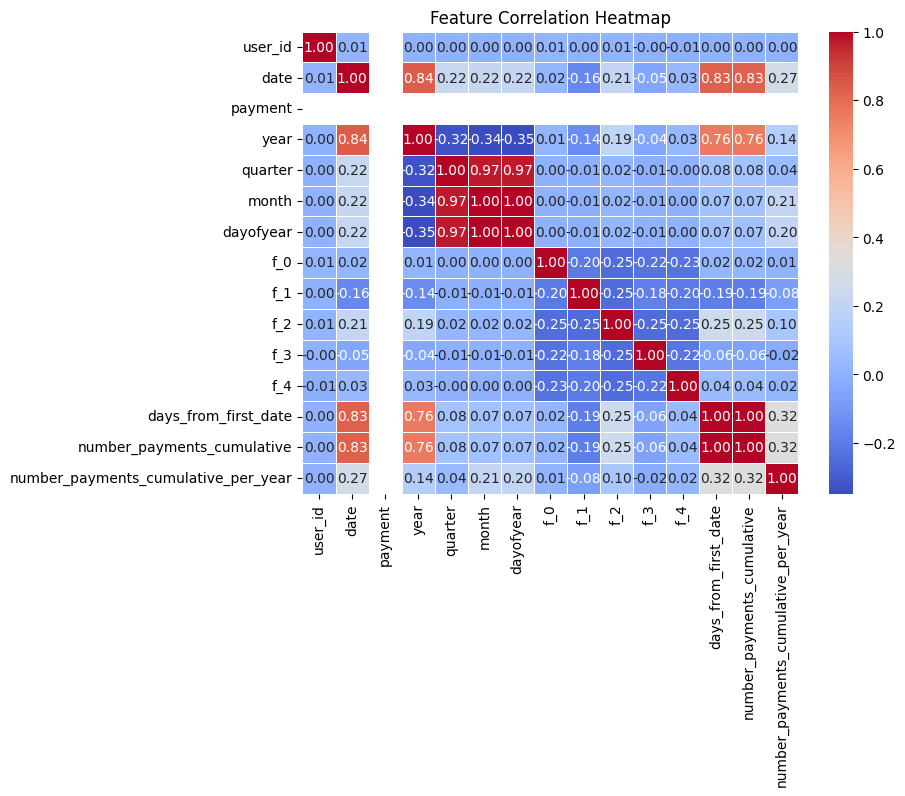

In [ ]:
#Check the correlation among features
# Compute correlation matrix
# corr_matrix = df_merged.corr()

# # Plot heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Feature Correlation Heatmap")
# plt.show()